In [0]:
%pip install --upgrade pip
%pip install awscli
%pip install tensorflow-serving-api
%pip install -q tensorflow-recommenders
%pip install --force-reinstall tensorflow==2.10.0

Python interpreter will be restarted.
Requirement already satisfied: pip in /local_disk0/.ephemeral_nfs/envs/pythonEnv-2359790f-9023-4027-b74f-41de9a11db96/lib/python3.8/site-packages (21.0.1)
Collecting pip
 Downloading pip-23.2.1-py3-none-any.whl (2.1 MB)
Installing collected packages: pip
 Attempting uninstall: pip
 Found existing installation: pip 21.0.1
 Uninstalling pip-21.0.1:
 Successfully uninstalled pip-21.0.1
Successfully installed pip-23.2.1
Python interpreter will be restarted.
Python interpreter will be restarted.
Collecting awscli
 Obtaining dependency information for awscli from https://files.pythonhosted.org/packages/71/4f/162367b05afa3444e9e61a4b88c32cd3b392e2f9bc45a2505d9488927662/awscli-1.29.35-py3-none-any.whl.metadata
 Downloading awscli-1.29.35-py3-none-any.whl.metadata (11 kB)
Collecting botocore==1.31.35 (from awscli)
 Obtaining dependency information for botocore==1.31.35 from https://files.pythonhosted.org/packages/35/5a/effb72e1cee7f9f3538a73b75870687cef1d9a377da7a70b75d7e1a38c5c/botocore-1.31.35-py3-none-any.whl.metadata
 Downloading botocore-1.31.35-py3-none-any.whl.metadata (6.0 kB)
Collecting docutils<0.17,>=0.10 (from awscli)
 Downloading docutils-0.16-py2.py3-none-any.whl (548 kB)
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 47.2 MB/s eta 0:00:00
Collecting s3transfer<0.7.0,>=0.6.0 (from awscli)
 Obtaining dependency information for s3transfer<0.7.0,>=0.6.0 from https://files.pythonhosted.org/packages/d9/17/a3b666f5ef9543cfd3c661d39d1e193abb9649d0cfbbfee3cf3b51d5af02/s3transfer-0.6.2-py3-none-any.whl.metadata
 Downloading s3transfer-0.6.2-py3-none-any.whl.metadata (1.8 kB)
Requirement already satisfied: PyYAML<6.1,>=3.10 in /databricks/python3/lib/python3.8/site-packages (from awscli) (5.4.1)
Collecting colorama<0.4.5,>=0.2.5 (from awscli)
 Downloading colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Collecting rsa<4.8,>=3.1.2 (from awscli)
 Downloading rsa-4.7.2-py3-none-any.whl (34 kB)
Requirement already satisfied: jmespath<2.0.0,>=0.7.1 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (0.10.0)
Requirement already satisfied: python-dateutil<3.0.0,>=2.1 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (2.8.1)
Requirement already satisfied: urllib3<1.27,>=1.25.4 in /databricks/python3/lib/python3.8/site-packages (from botocore==1.31.35->awscli) (1.25.11)
Requirement already satisfied: pyasn1>=0.1.3 in /databricks/python3/lib/python3.8/site-packages (from rsa<4.8,>=3.1.2->awscli) (0.4.8)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil<3.0.0,>=2.1->botocore==1.31.35->awscli) (1.15.0)
Downloading awscli-1.29.35-py3-none-any.whl (4.2 MB)
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 96.9 MB/s eta 0:00:00
Downloading botocore-1.31.35-py3-none-any.whl (11.1 MB)
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 70.1 MB/s eta 0:00:00
Downloading s3transfer-0.6.2-py3-none-any.whl (79 kB)
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 20.3 MB/s eta 0:00:00
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Installing collected packages: rsa, docutils, colorama, botocore, s3transfer, awscli
 Attempting uninstall: rsa
 Found existing installation: rsa 4.8
 Not uninstalling rsa at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-2359790f-9023-4027-b74f-41de9a11db96
 Can't uninstall 'rsa'. No files were found to uninstall.
 Attempting uninstall: botocore
 Found existing installation: botocore 1.19.7
 Not uninstalling botocore at /databricks/python3/lib/python3.8/site-packages, outside environm

In [0]:
# PACKAGES
import tensorflow as tf
import tensorflow_recommenders as tfrs
import random
import pickle
import boto3
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# PATHS
MEESHAWN_HOME = 's3://disco-adhoc/summerinterns2023/Meeshawn'
S3_BUCKET     = 'disco-adhoc'
S3_KEY        =  'summerinterns2023/Meeshawn'
TRAIN_FILE    = 'train_rail_clicks.tfrecords'
TEST_FILE     = 'test_rail_clicks.tfrecords'
LOCAL_DIR     = '/tmp/meeshawn'

# MODEL CONSTANTS
BATCH_SIZE         = 2048
DIM_PROG_EMBEDDING = 64
DIM_TIME_EMBEDDING = 64
DIM_ROW_EMBEDDING  = 64
MAX_SEQ_LENGTH     = 50
MAX_TOKENS         = 10000

s3 = boto3.client('s3')
tf.random.set_seed(9)

/databricks/python/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
 warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "

In [0]:

# LOAD THE TRAINING AND TEST DATA
dbutils.fs.mkdirs(f'file:{LOCAL_DIR}')
s3.download_file(S3_BUCKET, f'{S3_KEY}/train/{TRAIN_FILE}', f'{LOCAL_DIR}/{TRAIN_FILE}')
s3.download_file(S3_BUCKET, f'{S3_KEY}/test/{TEST_FILE}', f'{LOCAL_DIR}/{TEST_FILE}')

In [0]:
# HELPER FUNCTION: MAPPING FUNCTION FOR PARSING THE .TFRECORDS DATA & EXTRACTING RELEVANT DATA
def tfrecord_parser(data):
  schema = {'X_device_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
                 'event_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
                 'Y_row_node_id': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
                 'Y_row_node_id_title': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
                 'pinned': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
                 'transaction': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),    
                 'X_timestamp_clicks': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
                 'X_timestamp_service': tf.io.FixedLenSequenceFeature([], tf.int64, allow_missing=True),
                 'X_watch_history': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True),
                 'candidates': tf.io.FixedLenSequenceFeature([], tf.string, allow_missing=True)}

  data = tf.io.parse_single_example(data, schema)

  # timestamp           = data['X_timestamp_clicks'][0]
  X_watch_history     = data['X_watch_history']
  Y_row_node_id       = data['Y_row_node_id'][0]
  # Y_row_node_id_title = data['Y_row_node_id_title'][0]
  candidates          = data['candidates']

  # Appending Negative Samples
  random_index = tf.random.uniform(shape=(), maxval=tf.shape(candidates)[0], dtype=tf.int32)
  neg_candidate = tf.gather(candidates, random_index)
  candidates = tf.stack([Y_row_node_id, neg_candidate], axis=0)

  return (X_watch_history, Y_row_node_id, candidates)

def preprocess(X_watch_history, Y_row_node_id, candidates):
  return tf.data.Dataset.from_tensor_slices(candidates).map(lambda candidate: (X_watch_history,
                                                                              candidate,
                                                                              1.0 if candidate == Y_row_node_id else 0.0))

# READING TRAIN '.TFRECORDS' FILES INTO TENSORFLOW 
train_dataset = tf.data.TFRecordDataset(f'{LOCAL_DIR}/{TRAIN_FILE}').map(tfrecord_parser, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
                                                             .prefetch(tf.data.experimental.AUTOTUNE)\
                                                             .flat_map(preprocess)
train_dataset = train_dataset.shuffle(train_dataset.reduce(0, lambda x,_: x+1).numpy())\
                             .padded_batch(BATCH_SIZE, drop_remainder=True, 
                                           padding_values = ('','',tf.constant(0, dtype=tf.float32)))\
                             .prefetch(tf.data.experimental.AUTOTUNE)    

# READING TEST '.TFRECORDS' FILES INTO TENSORFLOW                                  
test_dataset = tf.data.TFRecordDataset(f'{LOCAL_DIR}/{TEST_FILE}').map(tfrecord_parser, num_parallel_calls=tf.data.experimental.AUTOTUNE)\
                                                            .prefetch(tf.data.experimental.AUTOTUNE)\
                                                            .flat_map(preprocess)
test_dataset = test_dataset.shuffle(test_dataset.reduce(0, lambda x,_: x+1).numpy())\
                           .padded_batch(BATCH_SIZE, drop_remainder=True, 
                                         padding_values = ('','',tf.constant(0, dtype=tf.float32)))\
                           .prefetch(tf.data.experimental.AUTOTUNE)      

In [0]:
print('Number of training datapoints: ', BATCH_SIZE*train_dataset.reduce(0, lambda x,_: x+1).numpy())
print('Number of test datapoints: ', BATCH_SIZE*test_dataset.reduce(0, lambda x,_: x+1).numpy())

Number of training datapoints: 4052992
Number of test datapoints: 1703936

In [0]:
for x in train_dataset.unbatch().take(52):
  print('Watch History', x[0])
  print('Clicked Row', x[1])
  print('Clicked?', x[2])

Watch History tf.Tensor(
[b'7670353015160325112' b'7856584228453359112' b'5826056383697604112'
 b'8113336143797124112' b'5991949539818180112' b'6503646211059865112'
 b'6975366868934873112' b'6619784348801987112' b'5996671029231320112'
 b'4975208609240728112' b'6505378499345602112' b'9076276240286146112'
 b'6562237097172780112' b'6398477763581825112' b'5931805018850689112'
 b'5486141884344449112' b'6574381223813355112' b'8502948670743787112'
 b'6848498290627243112' b'6173594468820075112' b'5960314297815296112'
 b'8143021617905472112' b'6083678618512512112' b'5594460937375488112'
 b'5950595683377172112' b'7061689366937364112' b'4887630455879764112'
 b'4812405559689748112' b'5885001737935337112' b'8315101612157801112'
 b'7613447875354153112' b'5724565492217150112' b'4682123876100072112'
 b'8075993342869522112' b'8411958334881029112' b'6180005412665340112'
 b'7963245693694332112' b'6860147590769702112' b'6620390415415867112'
 b'9144023062836859112' b'7583156417988624112' b'6948516664260432112'
 b'5275531181213775112' b'7669676319587279112' b'7283429732104356112'
 b'7570852421269156112' b'7709327065489529112' b'5164236658179982112'
 b'8126003727716878112' b'6591519176583907112' b'5830648341272163112'
 b'8069141189723277112' b'7587558251291661112' b'9176997707726861112'
 b'4798101278319138112' b'8038056425113847112' b'7577221437944631112'
 b'5290590883439820112' b'8051863064526284112' b'5335436206402081112'
 b'5929817152576545112' b'5595566311162678112' b'6766524145341174112'
 b'5581882058457099112' b'4869639615010912112' b'9218518538598880112'
 b'7472454785151989112' b'9137176253397066112' b'5087404266957919112'
 b'4796878997104884112' b'7710399475041844112' b'6330696868041374112'
 b'5565253695262451112' b'4650985802133043112' b'6121669153674504112'
 b'5972569835432136112' b'6847887614134536112' b'6299770438693768112'
 b'5886978278128861112' b'7340551336868401112' b'4904310342927963112'
 b'7686619207670405112' b'6058859306404266111' b'4838863241788426112'
 b'7031823085487834112' b'8425774850298330112' b'5257967725548628112'
 b'7089927997682830112' b'8126003727716878112' b'7306150282699934112'
 b'8620672665075347118' b'5790312375453112112' b'8644181470913192112'
 b'9093057561725624112' b'4952225497080712112' b'6299770438693768112'
 b'8430432951209805111' b'7295817113979869112' b'8805537249376125112'
 b'5194674910503090112' b'8786024983347874112' b'9186733141168706112'
 b'8157148934767938112' b'5356788027861927112' b'8996543549884791112'
 b'7577221437944631112' b'8734869884494354127' b'7963245693694332112'
 b'5827147521039228112' b'6715382180197276112' b'6382081888924289112'
 b'7583182824880577112' b'7193525624431414112' b'5690588971528619112'
 b'6593517933328027112' b'8257012345522395112' b'8502948670743787112'
 b'8785607481687595112' b'5169784376594107112' b'5960314297815296112'
 b'8678832915712016112' b'7207852342634816112' b'7976692459704805112'
 b'8164585839836738170' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b''
 b'' b'' b'

In [0]:
# WATCH HISTORY
watch_history_vectorizer = tf.keras.layers.TextVectorization(max_tokens=MAX_TOKENS, output_mode='int', output_sequence_length=MAX_SEQ_LENGTH, name='watch_history_vectorizer')
watch_history_vectorizer.adapt(train_dataset.unbatch().map(lambda X_watch_history, Y_row_node_id, target: X_watch_history))

with open(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', 'wb') as f:
  pickle.dump({'config':  watch_history_vectorizer.get_config(),
               'weights': watch_history_vectorizer.get_weights()}, f)
                
s3.upload_file(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', S3_BUCKET, f'{S3_KEY}/train/watch_history_vectorizer.pkl')


# RAIL/ROW NODE ID
row_embedding_mapper = tf.keras.layers.StringLookup(max_tokens=MAX_TOKENS, mask_token='', output_mode='int', name='row_embedding_mapper')# OOV token not req
row_embedding_mapper.adapt(train_dataset.unbatch().map(lambda X_watch_history, Y_row_node_id, target: Y_row_node_id))

with open(f'{LOCAL_DIR}/row_embedding_mapper.pkl', 'wb') as f:
  pickle.dump({'config':  row_embedding_mapper.get_config(),
               'weights': row_embedding_mapper.get_weights()}, f)
                
s3.upload_file(f'{LOCAL_DIR}/row_embedding_mapper.pkl', S3_BUCKET, f'{S3_KEY}/train/row_embedding_mapper.pkl')

--------------------------------------------------------------------------- 
 ExecutionError Traceback (most recent call last)
 <command-16824540> in <module> 
 18 'weights': row_embedding_mapper.get_weights()}, f)
 19 
 ---> 20 dbutils . fs . cp ( 'file:/dbfs/tmp/meeshawn/row_embedding_mapper.pkl' , f'{MEESHAWN_HOME}/train/row_embedding_mapper.pkl' ) 

 /databricks/python_shell/dbruntime/dbutils.py in f_with_exception_handling (*args, **kwargs) 
 389 exc . __context__ = None 
 390 exc . __cause__ = None 
 --> 391 raise exc
 392 
 393 return f_with_exception_handling

 ExecutionError : An error occurred while calling z:com.databricks.backend.daemon.dbutils.FSUtils.cp.
: org.apache.hadoop.fs.ChecksumException: Checksum error: file:/dbfs/tmp/meeshawn/row_embedding_mapper.pkl at 0 exp: 282650294 got: -88369016
	at org.apache.hadoop.fs.FSInputChecker.verifySums(FSInputChecker.java:347)
	at org.apache.hadoop.fs.FSInputChecker.readChecksumChunk(FSInputChecker.java:303)
	at org.apache.hadoop.fs.FSInputChecker.read1(FSInputChecker.java:252)
	at org.apache.hadoop.fs.FSInputChecker.read(FSInputChecker.java:197)
	at java.io.DataInputStream.read(DataInputStream.java:100)
	at org.apache.hadoop.io.IOUtils.copyBytes(IOUtils.java:94)
	at org.apache.hadoop.io.IOUtils.copyBytes(IOUtils.java:68)
	at org.apache.hadoop.io.IOUtils.copyBytes(IOUtils.java:129)
	at org.apache.hadoop.fs.FileUtil.copy(FileUtil.java:418)
	at org.apache.hadoop.fs.FileUtil.copy(FileUtil.java:390)
	at org.apache.hadoop.fs.FileUtil.copy(FileUtil.java:340)
	at com.databricks.backend.daemon.dbutils.FSUtils$.cpRecursive(DBUtilsCore.scala:224)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$cp$1(DBUtilsCore.scala:190)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$withCpSafetyChecks$2(DBUtilsCore.scala:106)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:91)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$withCpSafetyChecks$1(DBUtilsCore.scala:98)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:91)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withCpSafetyChecks(DBUtilsCore.scala:98)
	at com.databricks.backend.daemon.dbutils.FSUtils$.cp(DBUtilsCore.scala:187)
	at com.databricks.backend.daemon.dbutils.FSUtils.cp(DBUtilsCore.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:
s3.download_file(S3_BUCKET, f'{S3_KEY}/train/watch_history_vectorizer.pkl',f'{LOCAL_DIR}/watch_history_vectorizer.pkl')
with open(f'{LOCAL_DIR}/watch_history_vectorizer.pkl', 'rb') as f:
  vect_file = pickle.load(f)
  watch_history_vectorizer = tf.keras.layers.TextVectorization.from_config(vect_file['config'])
  watch_history_vectorizer.set_weights(vect_file['weights'])

s3.download_file(S3_BUCKET, f'{S3_KEY}/train/row_embedding_mapper.pkl',f'{LOCAL_DIR}/row_embedding_mapper.pkl')
with open(f'{LOCAL_DIR}/row_embedding_mapper.pkl', 'rb') as f:
  lookup_file = pickle.load(f)
  row_embedding_mapper = tf.keras.layers.StringLookup.from_config(lookup_file['config'])
  row_embedding_mapper.set_weights(lookup_file['weights'])  

In [0]:
print(watch_history_vectorizer.vocabulary_size())
print(row_embedding_mapper.vocabulary_size())

10000
475

In [0]:
embedVect = tf.keras.layers.Embedding(watch_history_vectorizer.vocabulary_size(), DIM_PROG_EMBEDDING, mask_zero = True )
embedLookUp = tf.keras.layers.Embedding(row_embedding_mapper.vocabulary_size(), DIM_ROW_EMBEDDING, mask_zero = True )
avg = tf.keras.layers.GlobalAveragePooling1D()                                             

for watchHist, click, target in train_dataset.take(1):
  # TEXT VECTORIZATION
  print(watchHist)
  print(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True)))
  print(embedVect(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True))))
  print(avg(embedVect(watch_history_vectorizer(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True)))))
  print(click)
  print(row_embedding_mapper(click))
  print(embedLookUp(row_embedding_mapper(click)))

tf.Tensor(
[[b'4935551334475850112' b'8954551503237514112' b'9145960898208298112'
 ... b'' b'' b'']
 [b'6373620435591002112' b'8955589597788079112' b'7214084965428911112'
 ... b'' b'' b'']
 [b'6832556329599066112' b'5081730868661162112' b'6814309259117690112'
 ... b'' b'' b'']
 ...
 [b'6488923146610794112' b'7773232513073535112' b'7669676319587279112'
 ... b'' b'' b'']
 [b'5226059603344813112' b'' b'' ... b'' b'' b'']
 [b'6331209413247530112' b'8118784557012618112' b'6840455509118074112'
 ... b'' b'' b'']], shape=(2048, 612), dtype=string)
tf.Tensor(
[[ 30 380 304 ... 609 3155 0]
 [ 167 59 384 ... 1271 4625 1362]
 [ 108 1050 246 ... 170 2444 215]
 ...
 [ 31 3750 819 ... 355 7447 9919]
 [ 24 0 0 ... 0 0 0]
 [5255 385 767 ... 236 3336 2663]], shape=(2048, 50), dtype=int64)
tf.Tensor(
[[[-0.03297237 -0.02419391 -0.01125001 ... -0.04258696 0.0429261
 0.03278276]
 [ 0.04993213 -0.00407768 -0.01850163 ... 0.02431587 0.01116478
 0.01666541]
 [-0.0385947 -0.04182148 0.04575076 ... -0.01782556 0.0092146
 -0.01688803]
 ...
 [ 0.02700121 0.01736443 0.03167 ... -0.02006687 -0.01397999
 -0.04422056]
 [-0.00736511 -0.04164659 0.02532126 ... -0.00251471 0.00469403
 -0.02460514]
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]]

 [[ 0.03498495 0.04577711 -0.0129674 ... 0.04610647 -0.04417442
 -0.01613314]
 [ 0.00093635 0.00368413 0.04562351 ... 0.04490024 -0.02289058
 -0.04809591]
 [-0.01487159 -0.00478638 0.01579709 ... -0.04124479 -0.0103369
 0.02975479]
 ...
 [-0.01581191 0.03846515 0.01550417 ... -0.04015891 0.00833046
 -0.0044333 ]
 [ 0.02589393 -0.03871006 -0.03590628 ... 0.04787025 -0.03084232
 -0.03781467]
 [ 0.00859774 -0.02779645 -0.03411098 ... 0.0090637 0.00263271
 -0.00605894]]

 [[-0.02377958 0.00628487 0.00418041 ... -0.01582303 -0.04045987
 -0.02938687]
 [ 0.02928141 0.04438884 0.03071246 ... 0.0283059 0.008835
 0.02863232]
 [-0.00409199 -0.0449633 -0.03788192 ... -0.00337891 0.03786422
 0.0462575 ]
 ...
 [ 0.03954378 -0.04988291 0.02350073 ... -0.04485737 -0.00440974
 0.04920829]
 [ 0.04195812 -0.04418721 0.03452113 ... -0.02671683 0.03305599
 0.00269287]
 [-0.04438528 0.0076759 -0.00982798 ... -0.02292081 0.04737631
 -0.04333781]]

 ...

 [[ 0.01123713 0.02560795 0.03794402 ... -0.02079304 -0.01009741
 -0.02755147]
 [-0.0181388 -0.01767439 0.04803494 ... -0.02651726 -0.00754337
 0.00246416]
 [ 0.00494879 0.02767842 0.01761461 ... -0.04327185 -0.03547853
 -0.02990297]
 ...
 [ 0.02847738 0.02561334 0.01279438 ... 0.02249149 0.02909021
 -0.04569983]
 [-0.02957231 0.02856114 -0.02688535 ... 0.03800433 -0.04152191
 0.01491708]
 [ 0.00019673 -0.03711092 0.03318149 ... -0.01158762 -0.03695046
 -0.04277968]]

 [[-0.01635622 0.03481073 0.0186319 ... 0.0332152 0.02158565
 0.00689469]
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]
 ...
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]
 [-0.03409401 0.00013275 0.01348059 ... -0.04778777 0.00913714
 0.03058309]]

 [[-0.04663369 -0.00703651 0.01583239 ... 0.0444239 0.00882019
 -0.01795978]
 [ 0.03021235 0.02875887 -0.00456 ... 0.00340682 0.03987033
 -0.04596126]
 [ 0.0487206 -0.00185806 -0.03730291 ... -0.03085086 0.00681194
 -0.00208964]
 ...
 [ 0.03025543 0.01729283 -0.02504232 ... -0.03140844 0.03613244
 -0.04440528]
 [-0.00298008 -0.04371456 -0.03134941 ... -0.01532458 -0.02574121
 0.03565346]
 [ 0.00704163 0.03283924 -0.02758073 ... 0.01041293 0.00570567
 -0.04368916]]], shape=(2048, 50, 64), dtype=float32)
tf.Tensor(
[[-2.4795758e-03 -9.2056915e-03 -8.6242622e-03 ... -1.4516379e-03
 -5.9266798e-03 -5.8983150e-03]
 [-7.9285018e-03 6.5376313e-04 -1.8841071e-03 ... 7.3281182e-03
 -2.7126891e-03 -5.8317888e-03]
 [-5.5956203e-03 8.2873497e-03 -7.0606644e-04 ... 1.5155775e-03
 -2.8311128e-03 -7.6152408e-04]
 ...
 [-4.5149303e-03 -2.1799357e-05 -1.9942205e-03 

In [0]:
# TWO-TOWER RANKING MODEL FOR ROW/RAIL NODE CLICKS
class TwoTowers(tfrs.Model):
  def __init__(self):
    super().__init__()
    
    # USER WATCH HISTORY FEATURE
    self.user_tower = tf.keras.Sequential([watch_history_vectorizer,
                                            tf.keras.layers.Embedding(watch_history_vectorizer.vocabulary_size(), 
                                                                      DIM_PROG_EMBEDDING, mask_zero = True,
                                                                      name = 'watch_history_embedding_layer'),
                                            tf.keras.layers.GlobalAveragePooling1D(name = 'watch_history_AVG_1D')], 
                                            name = 'watch_history_embedding')      
    
    # ROW FEATURE
    self.menu_tower = tf.keras.Sequential([row_embedding_mapper,
                                          tf.keras.layers.Embedding(row_embedding_mapper.vocabulary_size(),
                                                                      DIM_ROW_EMBEDDING, mask_zero=True,
                                                                      name = 'row_embedding_layer')],
                                           name = 'row_embedding')
    
    self.interaction_model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation="relu"),
                                                  tf.keras.layers.Dense(64, activation="relu"),
                                                  tf.keras.layers.Dense(1, activation='sigmoid')],
                                                  name = 'user_menu_dense_layer_interaction')       
    
    # TFRS TASK
    self.task = tfrs.tasks.Ranking(loss=tf.keras.losses.BinaryCrossentropy(),
                                    metrics=[tf.keras.metrics.BinaryAccuracy()],
                                    name = 'tfrs_ranking_layer')    
    
                                              
  def call(self, inputs):
    watchHist, rowClick = inputs
    user_embedding = self.user_tower(tf.strings.reduce_join(watchHist, separator=' ', axis=1, keepdims=True))  
    menu_embedding = self.menu_tower(rowClick)
    return self.interaction_model(tf.concat([user_embedding, menu_embedding], axis=1))
    

  def compute_loss(self, inputs, training=False):
    watchHist, rowClick, labels = inputs
    predictions = self([watchHist, rowClick])
    return self.task(labels=labels, predictions=predictions)

In [0]:
cached_train = train_dataset.cache()
cached_test = test_dataset.cache()

clickPredictor = TwoTowers()
clickPredictor.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

num_epochs = 20
history = clickPredictor.fit(cached_train, epochs=num_epochs)

Epoch 1/20
 1/Unknown - 221s 221s/step - binary_accuracy: 0.5332 - loss: 0.6925 - regularization_loss: 0.0000e+00 - total_loss: 0.6925 2/Unknown - 222s 117ms/step - binary_accuracy: 0.5410 - loss: 0.6922 - regularization_loss: 0.0000e+00 - total_loss: 0.6922 3/Unknown - 222s 136ms/step - binary_accuracy: 0.5688 - loss: 0.6916 - regularization_loss: 0.0000e+00 - total_loss: 0.6916 4/Unknown - 222s 129ms/step - binary_accuracy: 0.5903 - loss: 0.6911 - regularization_loss: 0.0000e+00 - total_loss: 0.6911 5/Unknown - 222s 121ms/step - binary_accuracy: 0.5947 - loss: 0.6907 - regularization_loss: 0.0000e+00 - total_loss: 0.6907 6/Unknown - 222s 124ms/step - binary_accuracy: 0.6008 - loss: 0.6903 - regularization_loss: 0.0000e+00 - total_loss: 0.6903 7/Unknown - 222s 122ms/step - binary_accuracy: 0.6065 - loss: 0.6899 - regularization_loss: 0.0000e+00 - total_loss: 0.6899 8/Unknown - 222s 124ms/step - binary_accuracy: 0.6056 - loss: 0.6895 - regularization_loss: 0.0000e+00 - total_loss: 0.6895 9/Unknown - 222s 120ms/step - binary_accuracy: 0.6115 - loss: 0.6891 - regularization_loss: 0.0000e+00 - total_loss: 0.6891 10/Unknown - 222s 117ms/step - binary_accuracy: 0.6141 - loss: 0.6886 - regularization_loss: 0.0000e+00 - total_loss: 0.6886 11/Unknown - 223s 118ms/step - binary_accuracy: 0.6147 - loss: 0.6882 - regularization_loss: 0.0000e+00 - total_loss: 0.6882 12/Unknown - 223s 116ms/step - binary_accuracy: 0.6157 - loss: 0.6877 - regularization_loss: 0.0000e+00 - total_loss: 0.6877 13/Unknown - 223s 114ms/step - binary_accuracy: 0.6188 - loss: 0.6872 - regularization_loss: 0.0000e+00 - total_loss: 0.6872 14/Unknown - 223s 113ms/step - binary_accuracy: 0.6249 - loss: 0.6867 - regularization_loss: 0.0000e+00 - total_loss: 0.6867 15/Unknown - 223s 113ms/step - binary_accuracy: 0.6294 - loss: 0.6862 - regularization_loss: 0.0000e+00 - total_loss: 0.6862 16/Unknown - 223s 112ms/step - binary_accuracy: 0.6374 - loss: 0.6857 - regularization_loss: 0.0000e+00 - total_loss: 0.6857

Out[11]:

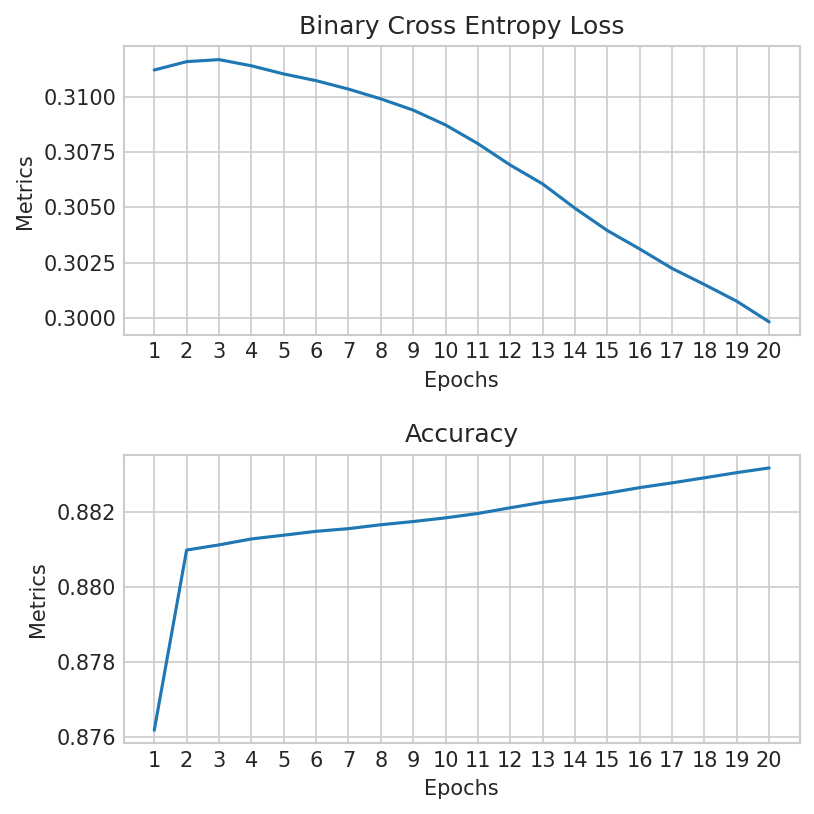

[<matplotlib.axis.XTick at 0x7fe10c909a00>,
 <matplotlib.axis.XTick at 0x7fe10c909280>,
 <matplotlib.axis.XTick at 0x7fe10c98ca90>,
 <matplotlib.axis.XTick at 0x7fe10c996d90>,
 <matplotlib.axis.XTick at 0x7fe10c996790>,
 <matplotlib.axis.XTick at 0x7fe10c98ad90>,
 <matplotlib.axis.XTick at 0x7fe10c8fadc0>,
 <matplotlib.axis.XTick at 0x7fe10c97e670>,
 <matplotlib.axis.XTick at 0x7fe10c985f40>,
 <matplotlib.axis.XTick at 0x7fe10c9748e0>,
 <matplotlib.axis.XTick at 0x7fe10c9f0640>,
 <matplotlib.axis.XTick at 0x7fe10c9f0d60>,
 <matplotlib.axis.XTick at 0x7fe10c9e7160>,
 <matplotlib.axis.XTick at 0x7fe10c9f0190>,
 <matplotlib.axis.XTick at 0x7fe10c974550>,
 <matplotlib.axis.XTick at 0x7fe10c978370>,
 <matplotlib.axis.XTick at 0x7fe10c9e7550>,
 <matplotlib.axis.XTick at 0x7fe10c9d6520>,
 <matplotlib.axis.XTick at 0x7fe10c9d6490>,
 <matplotlib.axis.XTick at 0x7fe10c9e2a90>]

In [0]:
epochs = range(1,num_epochs+1,1)
fig, axs = plt.subplots(2, figsize=(6,6))
fig.tight_layout(pad=4)
fig.dpi = 150
axs[0].plot(epochs, history.history['loss'],label='loss')
axs[0].title.set_text('Binary Cross Entropy Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Metrics')
axs[0].set_xticks(epochs)
axs[1].plot(epochs, history.history['binary_accuracy'])
axs[1].title.set_text('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Metrics')
axs[1].set_xticks(epochs)

In [0]:
metrics = clickPredictor.evaluate(cached_test, return_dict=True)
print(f"Test Accuracy: {metrics['binary_accuracy']}")

WARNING:tensorflow:`evaluate()` received a value for `sample_weight`, but `weighted_metrics` were not provided. Did you mean to pass metrics to `weighted_metrics` in `compile()`? If this is intentional you can pass `weighted_metrics=[]` to `compile()` in order to silence this warning.
 1/Unknown - 93s 93s/step - binary_accuracy: 0.8936 - loss: 0.2873 - regularization_loss: 0.0000e+00 - total_loss: 0.2873 2/Unknown - 94s 111ms/step - binary_accuracy: 0.8840 - loss: 0.3063 - regularization_loss: 0.0000e+00 - total_loss: 0.3063 3/Unknown - 94s 103ms/step - binary_accuracy: 0.8804 - loss: 0.3118 - regularization_loss: 0.0000e+00 - total_loss: 0.3118 4/Unknown - 94s 96ms/step - binary_accuracy: 0.8845 - loss: 0.3036 - regularization_loss: 0.0000e+00 - total_loss: 0.3036  5/Unknown - 94s 97ms/step - binary_accuracy: 0.8859 - loss: 0.2997 - regularization_loss: 0.0000e+00 - total_loss: 0.2997 6/Unknown - 94s 98ms/step - binary_accuracy: 0.8883 - loss: 0.2949 - regularization_loss: 0.0000e+00 - total_loss: 0.2949 7/Unknown - 94s 95ms/step - binary_accuracy: 0.8886 - loss: 0.2940 - regularization_loss: 0.0000e+00 - total_loss: 0.2940 8/Unknown - 94s 96ms/step - binary_accuracy: 0.8878 - loss: 0.2957 - regularization_loss: 0.0000e+00 - total_loss: 0.2957 9/Unknown - 94s 97ms/step - binary_accuracy: 0.8862 - loss: 0.2976 - regularization_loss: 0.0000e+00 - total_loss: 0.2976 10/Unknown - 94s 96ms/step - binary_accuracy: 0.8858 - loss: 0.2980 - regularization_loss: 0.0000e+00 - total_loss: 0.2980 11/Unknown - 94s 98ms/step - binary_accuracy: 0.8848 - loss: 0.2991 - regularization_loss: 0.0000e+00 - total_loss: 0.2991 12/Unknown - 94s 99ms/step - binary_accuracy: 0.8845 - loss: 0.3004 - regularization_loss: 0.0000e+00 - total_loss: 0.3004 13/Unknown - 95s 100ms/step - binary_accuracy: 0.8848 - loss: 0.2998 - regularization_loss: 0.0000e+00 - total_loss: 0.2998 14/Unknown - 95s 101ms/step - binary_accuracy: 0.8852 - loss: 0.2987 - regularization_loss: 0.0000e+00 - total_loss: 0.2987 15/Unknown - 95s 100ms/step - binary_accuracy: 0.8847 - loss: 0.2991 - regularization_loss: 0.0000e+00 - total_loss: 0.2991

In [0]:
for watchHist, click, target in cached_test.take(1):
  print('Prediction: ', clickPredictor((watchHist, click)))
  print('Label: ', target)

Prediction: tf.Tensor(
[[0.5080564 ]
 [0.5650285 ]
 [0.71932817]
 ...
 [0.7648283 ]
 [0.90315175]
 [0.07082383]], shape=(2048, 1), dtype=float32)
Label: tf.Tensor([1. 1. 0. ... 1. 1. 0.], shape=(2048,), dtype=float32)

In [0]:
clickPredictor.summary()

Model: "two_towers"
_________________________________________________________________
 Layer (type) Output Shape Param # 
=================================================================
 watch_history_embedding (Se (None, 64) 640000 
 quential) 
 
 row_embedding (Sequential) (2048, 64) 30400 
 
 user_menu_dense_layer_inter (2048, 1) 24833 
 action (Sequential) 
 
 tfrs_ranking_layer (Ranking multiple 0 
 ) 
 
=================================================================
Total params: 695,233
Trainable params: 695,233
Non-trainable params: 0
_________________________________________________________________

In [0]:
# TRAINED MODEL
clickPredictor.save(f'{LOCAL_DIR}/clickPredictor/')
for filename in dbutils.fs.ls(f'file:{LOCAL_DIR}/clickPredictor/'):
  if filename.isDir():
    folderName = filename.name[:-1]
    for nestedFile in dbutils.fs.ls(filename.path):
      name = nestedFile.name
      filepath = nestedFile.path.replace('file:','')
      s3.upload_file(filepath, S3_BUCKET, f'{S3_KEY}/train/clickPredictor/{folderName}/{name}')
  else:
    name = filename.name
    filepath = filename.path.replace('file:','')
    s3.upload_file(filepath, S3_BUCKET, f'{S3_KEY}/train/clickPredictor/{name}')

# HISTORY    
with open(f'{LOCAL_DIR}/clickPredictor/history.json', 'w') as f:
  import json
  json.dump(history.history, f)
s3.upload_file(f'{LOCAL_DIR}/clickPredictor/history.json', S3_BUCKET, f'{S3_KEY}/train/clickPredictor/history.json')

WARNING:absl:Found untraced functions such as tfrs_ranking_layer_layer_call_fn, tfrs_ranking_layer_layer_call_and_return_conditional_losses while saving (showing 2 of 2). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /tmp/meeshawn/clickPredictor/assets
INFO:tensorflow:Assets written to: /tmp/meeshawn/clickPredictor/assets

In [0]:
for file in dbutils.fs.ls(f'{MEESHAWN_HOME}/train/clickPredictor/'):
  print(file)

FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/clickPredictor/history.json', name='history.json', size=1344, modificationTime=1693031360000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/clickPredictor/keras_metadata.pb', name='keras_metadata.pb', size=22157, modificationTime=1693031360000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/clickPredictor/saved_model.pb', name='saved_model.pb', size=763328, modificationTime=1693031360000)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/clickPredictor/assets/', name='assets/', size=0, modificationTime=1693031624692)
FileInfo(path='s3://disco-adhoc/summerinterns2023/Meeshawn/train/clickPredictor/variables/', name='variables/', size=0, modificationTime=1693031624692)